### 数据归一化：将所有数据映射到同一尺度中
#### 最值归一化(normalization)：把所有数据映射到0-1之间，适用于分布有明显边界的情况；受outlier影响大
#### 改进->均值方差归一化(standardization)：把所有数据归一到均值为0方差为1的分布中

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 最值归一化 Normalization

In [2]:
x = np.random.randint(0,100,size=100)
x

array([96, 18, 21, 48, 69, 13, 82, 65, 30, 83, 59,  4, 56, 70, 11, 65, 74,
       76, 22, 46, 85, 53,  2, 38, 23, 99, 33, 18, 34, 80, 54, 44, 88, 99,
       53, 53, 78,  2, 26, 79, 19, 89,  6, 89,  6, 96, 68, 59, 90, 12,  7,
       59,  9, 57, 98, 38, 97, 68, 29,  6, 53, 38, 70, 86,  4, 74, 75, 83,
       96, 29, 28, 23, 79, 26, 33,  0, 55, 97, 81, 33, 93, 40, 60, 41, 90,
       12, 28, 44, 20,  2, 21, 15, 10, 92, 97, 44, 17, 41, 40, 49])

In [3]:
(x - np.min(x))/(np.max(x)-np.min(x))

array([0.96969697, 0.18181818, 0.21212121, 0.48484848, 0.6969697 ,
       0.13131313, 0.82828283, 0.65656566, 0.3030303 , 0.83838384,
       0.5959596 , 0.04040404, 0.56565657, 0.70707071, 0.11111111,
       0.65656566, 0.74747475, 0.76767677, 0.22222222, 0.46464646,
       0.85858586, 0.53535354, 0.02020202, 0.38383838, 0.23232323,
       1.        , 0.33333333, 0.18181818, 0.34343434, 0.80808081,
       0.54545455, 0.44444444, 0.88888889, 1.        , 0.53535354,
       0.53535354, 0.78787879, 0.02020202, 0.26262626, 0.7979798 ,
       0.19191919, 0.8989899 , 0.06060606, 0.8989899 , 0.06060606,
       0.96969697, 0.68686869, 0.5959596 , 0.90909091, 0.12121212,
       0.07070707, 0.5959596 , 0.09090909, 0.57575758, 0.98989899,
       0.38383838, 0.97979798, 0.68686869, 0.29292929, 0.06060606,
       0.53535354, 0.38383838, 0.70707071, 0.86868687, 0.04040404,
       0.74747475, 0.75757576, 0.83838384, 0.96969697, 0.29292929,
       0.28282828, 0.23232323, 0.7979798 , 0.26262626, 0.33333

In [4]:
X = np.random.randint(0,100,(50,2))

In [5]:
X[:10,:]

array([[28, 83],
       [ 5, 48],
       [18, 45],
       [43, 61],
       [46, 92],
       [69, 77],
       [97, 45],
       [19, 44],
       [78, 78],
       [56, 67]])

In [6]:
X = np.array(X, dtype = float)

In [7]:
X[:10,:]

array([[28., 83.],
       [ 5., 48.],
       [18., 45.],
       [43., 61.],
       [46., 92.],
       [69., 77.],
       [97., 45.],
       [19., 44.],
       [78., 78.],
       [56., 67.]])

In [8]:
for i in range(0,2):
    X[:,i] = (X[:,i]-np.min(X[:,i]))/(np.max(X[:,i])-np.min(X[:,i]))

In [9]:
X[:10,:]

array([[0.28865979, 0.83333333],
       [0.05154639, 0.46875   ],
       [0.18556701, 0.4375    ],
       [0.44329897, 0.60416667],
       [0.4742268 , 0.92708333],
       [0.71134021, 0.77083333],
       [1.        , 0.4375    ],
       [0.19587629, 0.42708333],
       [0.80412371, 0.78125   ],
       [0.57731959, 0.66666667]])

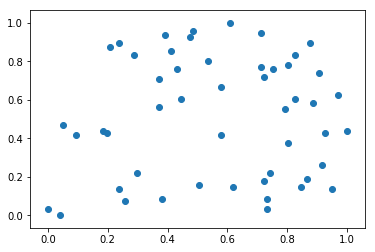

In [10]:
plt.scatter(X[:,0],X[:,1])

In [12]:
np.mean(X[:,0])

0.5659793814432991

In [13]:
np.mean(X[:,1])

0.51375

In [14]:
np.std(X[:,1])

0.3083434683018994

### 均值方差归一化

In [17]:
X2 = np.random.randint(0,100,(50,2))
X2 = np.array(X2, dtype= float)

In [18]:
for i in range(0,2):
    X2[:,i] = (X2[:,i] - np.mean(X2[:,i]))/np.std(X2[:,i])

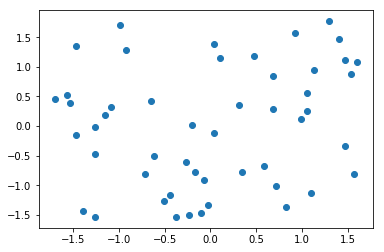

In [19]:
plt.scatter(X2[:,0],X2[:,1])

In [21]:
np.mean(X2[:,0])

-5.773159728050814e-17

In [22]:
np.std(X2[:,0])

1.0

### 如何对测试集归一化
#### 也用训练集的平均值与方差做 -> (x_test - mean_train)/std_train

## sklearn 中的Scaler

In [23]:
import numpy as np
from sklearn import datasets

In [24]:
iris = datasets.load_iris()

In [25]:
X = iris.data
y = iris.target

In [26]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state = 666)

### StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
stdScaler = StandardScaler()

In [30]:
stdScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
stdScaler.mean_

array([5.83416667, 3.08666667, 3.70833333, 1.17      ])

In [34]:
stdScaler.scale_  ##标准差 描述数据分布范围

array([0.81019502, 0.44327067, 1.76401924, 0.75317107])

In [35]:
stdScaler.transform(X_train)

array([[-0.90616043,  0.93246262, -1.30856471, -1.28788802],
       [-1.15301457, -0.19551636, -1.30856471, -1.28788802],
       [-0.16559799, -0.64670795,  0.22203084,  0.17260355],
       [ 0.45153738,  0.70686683,  0.95898425,  1.50032315],
       [-0.90616043, -1.32349533, -0.40154513, -0.09294037],
       [ 1.43895396,  0.25567524,  0.56216318,  0.30537551],
       [ 0.3281103 , -1.09789954,  1.0723617 ,  0.30537551],
       [ 2.1795164 , -0.19551636,  1.63924894,  1.23477923],
       [-0.78273335,  2.2860374 , -1.25187599, -1.42065998],
       [ 0.45153738, -2.00028272,  0.44878573,  0.43814747],
       [ 1.80923518, -0.42111215,  1.46918276,  0.83646335],
       [ 0.69839152,  0.25567524,  0.90229552,  1.50032315],
       [ 0.20468323,  0.70686683,  0.44878573,  0.57091943],
       [-0.78273335, -0.87230374,  0.10865339,  0.30537551],
       [-0.53587921,  1.38365421, -1.25187599, -1.28788802],
       [-0.65930628,  1.38365421, -1.25187599, -1.28788802],
       [-1.0295875 ,  0.

In [36]:
X_train 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [6.2, 3.4, 5.4, 2.3],
       [5.1, 2.5, 3. , 1.1],
       [7. , 3.2, 4.7, 1.4],
       [6.1, 2.6, 5.6, 1.4],
       [7.6, 3. , 6.6, 2.1],
       [5.2, 4.1, 1.5, 0.1],
       [6.2, 2.2, 4.5, 1.5],
       [7.3, 2.9, 6.3, 1.8],
       [6.4, 3.2, 5.3, 2.3],
       [6. , 3.4, 4.5, 1.6],
       [5.2, 2.7, 3.9, 1.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [4.4, 2.9, 1.4, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [6.5, 3.2, 5.1, 2. ],
       [5.7, 2.9, 4.2, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6. , 2.9, 4.5, 1.5],
       [4.7, 3.2, 1.6, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.3, 2.7, 4.9, 1.8],
       [6.1, 2.8, 4.7, 1.2],
       [6.2, 2.8, 4.8, 1.8],
       [5.7, 4.4, 1.5, 0.4],
       [6.3, 2.5, 4.9, 1.5],
       [6.4, 2.9, 4.3, 1.3],
       [5.1, 3

In [37]:
X_train = stdScaler.transform(X_train)

In [38]:
X_test_standard = stdScaler.transform(X_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [41]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [42]:
knn_clf.score(X_test_standard,y_test)

1.0